In [11]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.impute import KNNImputer


In [6]:
# load the dataset

data = pd.read_csv('merged_data_updated.csv')

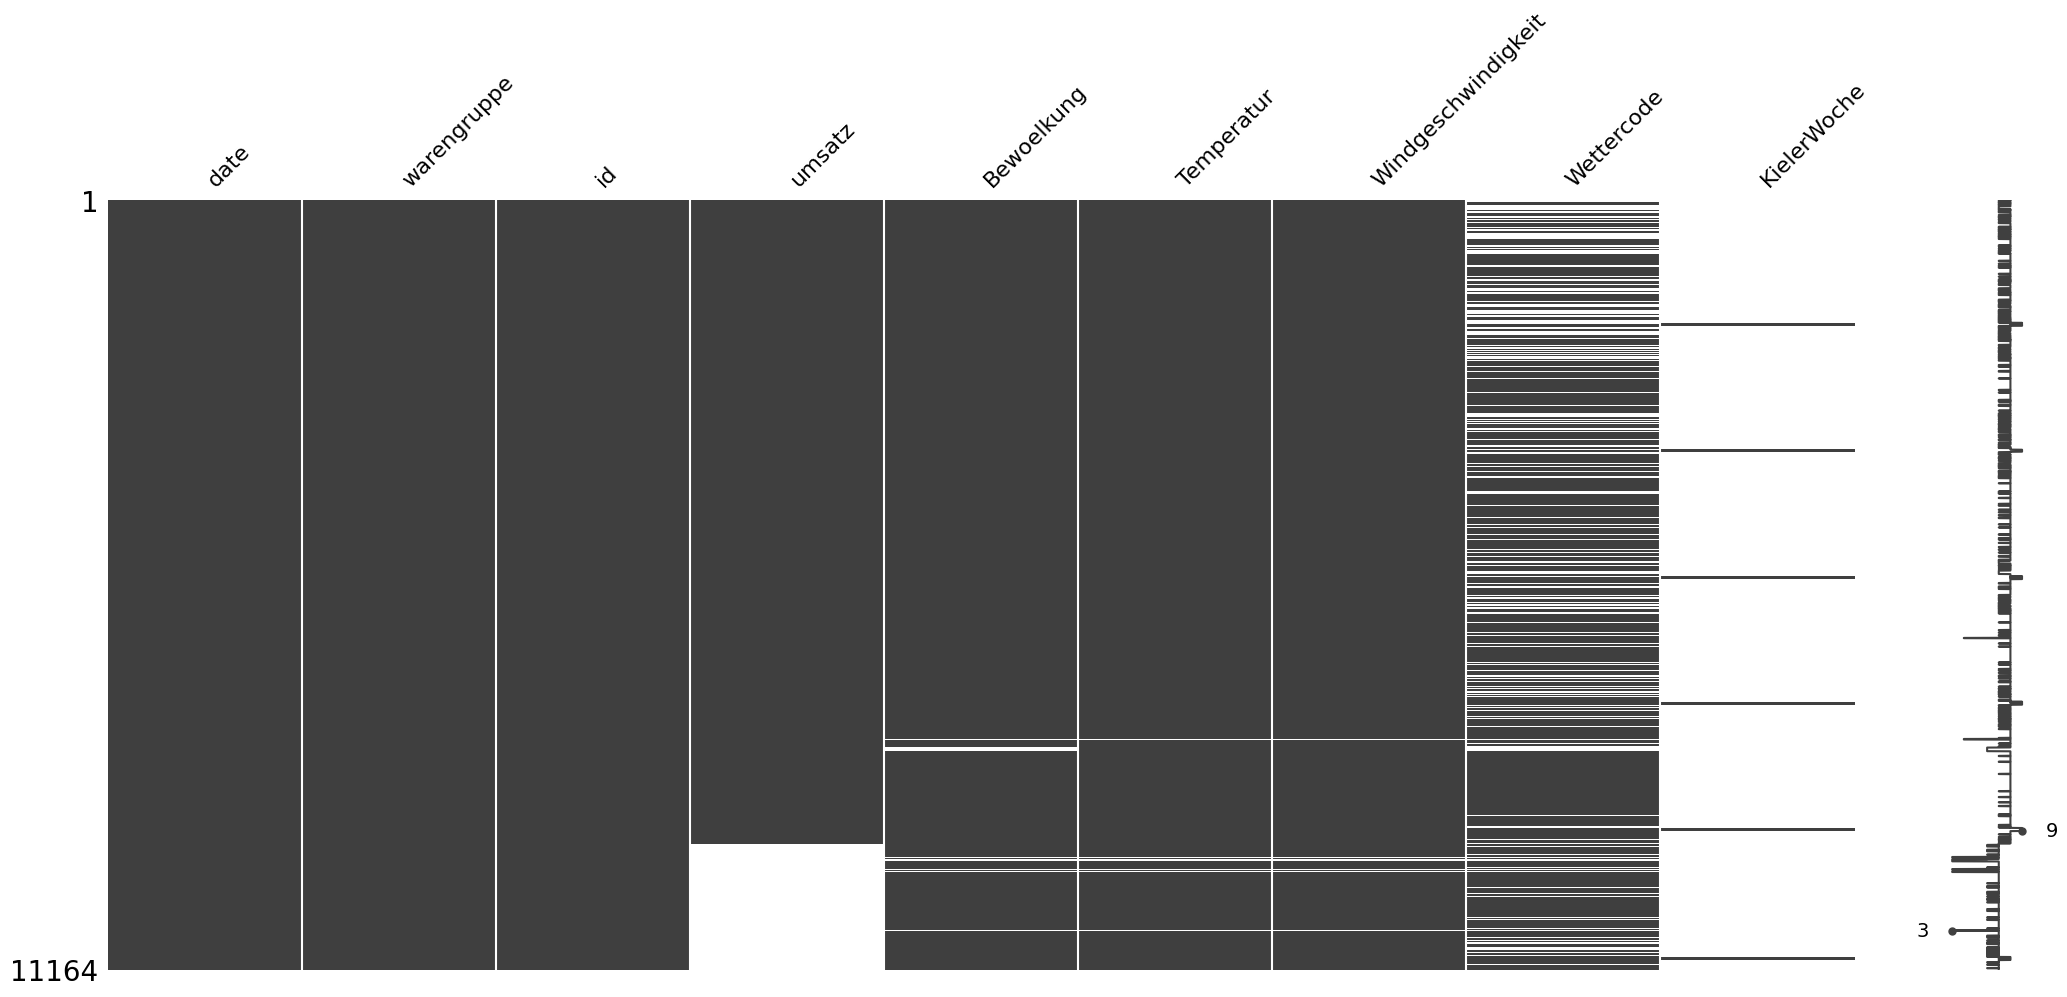

In [7]:
# Visualization of missing values
msno.matrix(data)
plt.show()

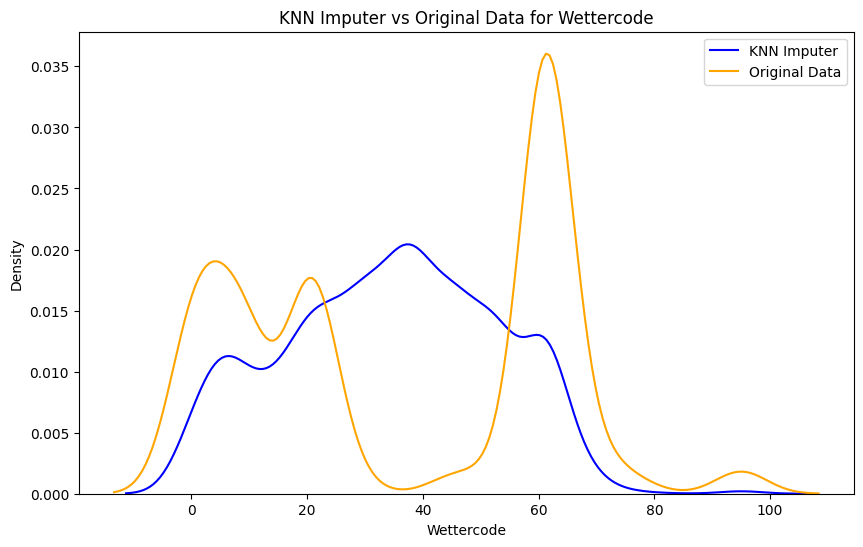

In [ ]:
# imputation of missing values (only for 'Wettercode' column)

# masking missing values
data_masked = data['Wettercode'].isna()

# making data numerical for KNN Imputer
from sklearn.preprocessing import OrdinalEncoder

numeric_cols = data.select_dtypes(include='number').columns
non_numeric_cols = data.select_dtypes(exclude='number').columns

encoder = OrdinalEncoder()
data[non_numeric_cols] = encoder.fit_transform(data[non_numeric_cols]) #needs to be decoted later!

# Using KNN Imputer
knn_imputer = KNNImputer()
data_knn = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)

# Iterative Robust Model Imputer
imputer_irmi = IterativeImputer()
data_irmi = pd.DataFrame(imputer_irmi.fit_transform(data), columns=data.columns)

# visualizing the imputed values for KNN Imputer
plt.figure(figsize=(10, 6))
sns.kdeplot(data_knn.loc[data_masked, 'Wettercode'], label='KNN Imputer', color='blue')
sns.kdeplot(data.loc[~data_masked, 'Wettercode'], label='Original Data', color='orange')
plt.title('KNN Imputer vs Original Data for Wettercode')
plt.xlabel('Wettercode')
plt.ylabel('Density')
plt.legend()
plt.show()